**EDA simple project**


*   Removing duplicates

* Missing value treatment

* Outlier Treatment

* Normalization and Scaling( Numerical Variables)

* Encoding Categorical variables( Dummy Variables)

* Univerate Analysis

* Bivariate Analysis





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/academicStress.csv')


* head of the dataset
* shape of the dataset
* info of the dataset
* summary of the dataset

In [ ]:
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [ ]:
df.shape

(121, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            121 non-null    object
 1   Your Academic Stage                                                  121 non-null    object
 2   Peer pressure                                                        121 non-null    int64 
 3   Academic pressure from your home                                     121 non-null    int64 
 4   Study Environment                                                    121 non-null    object
 5   What coping strategy you use as a student?                           121 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  121 non-null    object
 7   What would you rat

In [ ]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,121.000000,121.000000,121.000000,121.000000
mean,3.008264,3.190083,3.553719,3.669421
std,1.083942,1.260384,0.991215,1.059783
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


**check for duplicate records**

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index


In [ ]:
df.shape

(121, 9)

**To check for outliers, we will be plotting the box plots.**

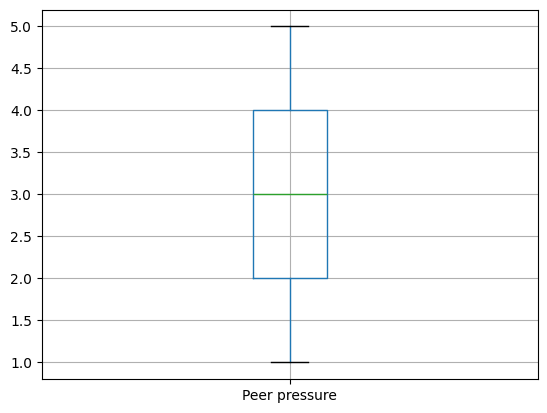

In [ ]:
df.boxplot(column=['Peer pressure'])
plt.show()

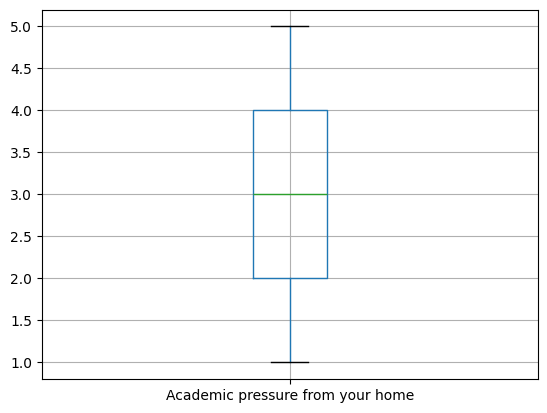

In [ ]:
df.boxplot(column=['Academic pressure from your home'])
plt.show()

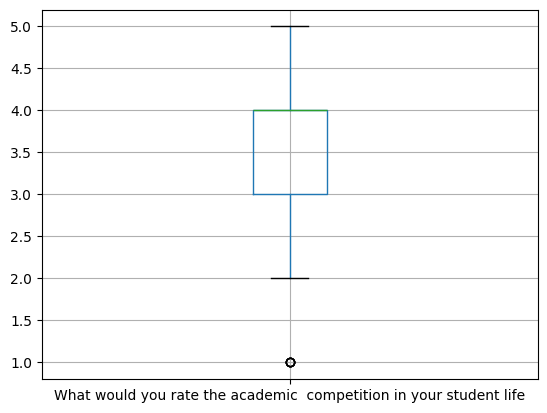

In [ ]:
df.boxplot(column=['What would you rate the academic  competition in your student life'])
plt.show()

removal of **outlier**

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
col_name = 'What would you rate the academic  competition in your student life'

lr_academic, ur_academic = remove_outlier(df[col_name])

df[col_name] = np.where(df[col_name] > ur_academic, ur_academic, df[col_name])

df[col_name] = np.where(df[col_name] < lr_academic, lr_academic, df[col_name])

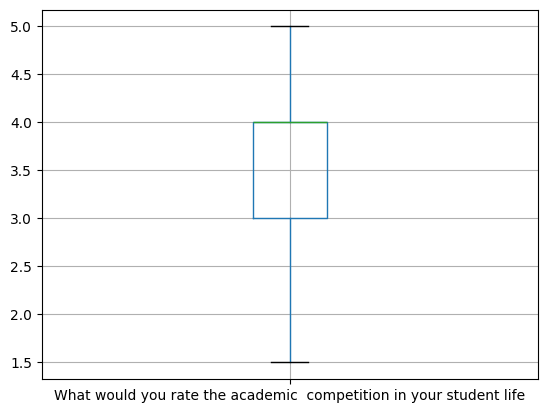

In [ ]:
df.boxplot(column=['What would you rate the academic  competition in your student life'])
plt.show()

check for missing values


In [ ]:

df.isnull().sum()[df.isnull().sum()>0]

,0


Univariate Analysis

<Axes: xlabel='Rate your academic stress index ', ylabel='Count'>

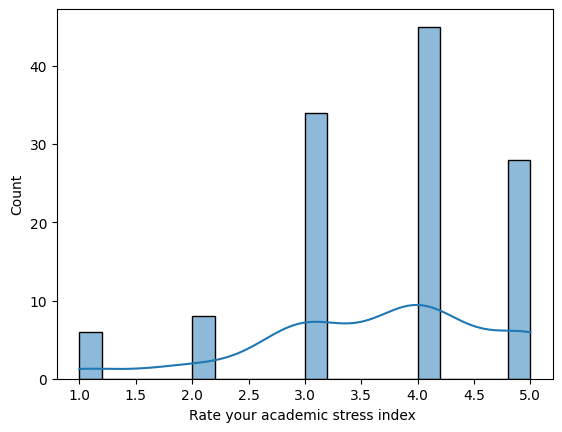

In [ ]:
sns.distplot(df['Rate your academic stress index '], bins=20)

bivariate analysis

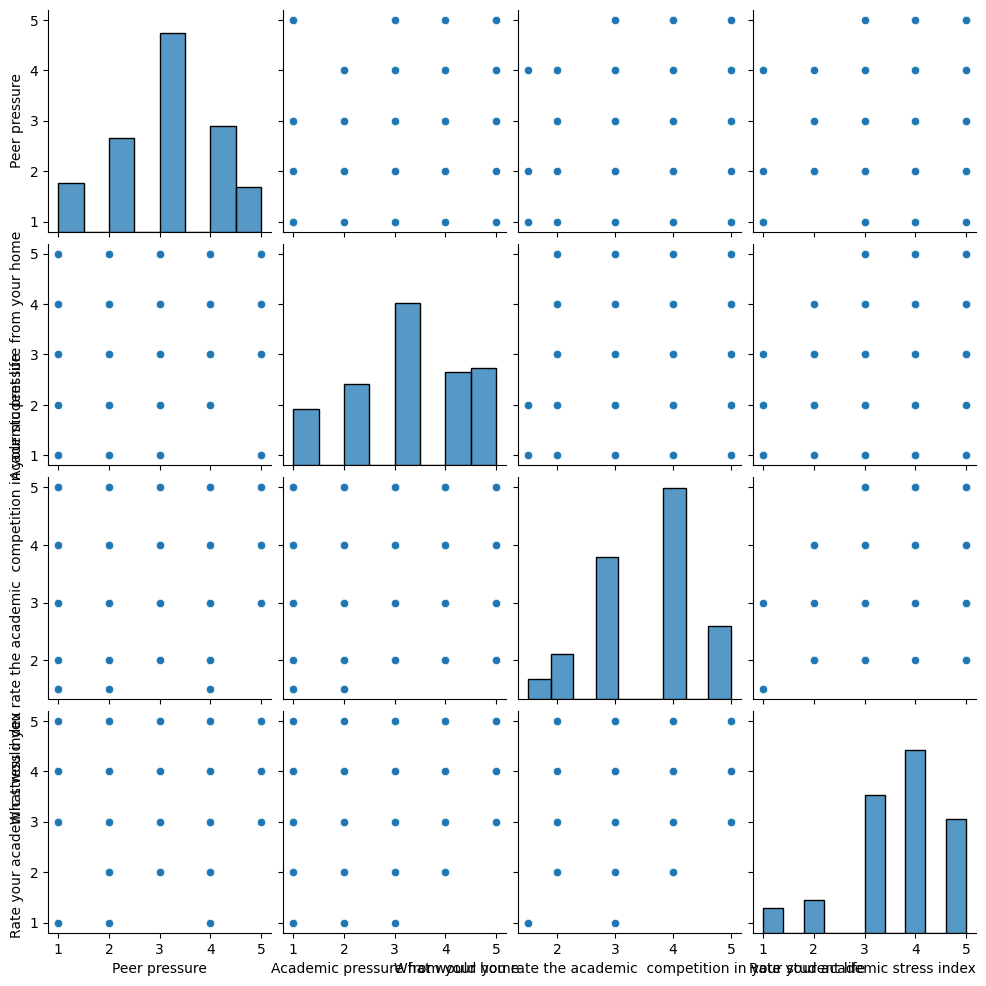

In [ ]:
sns.pairplot(df)
plt.show()

pairplot

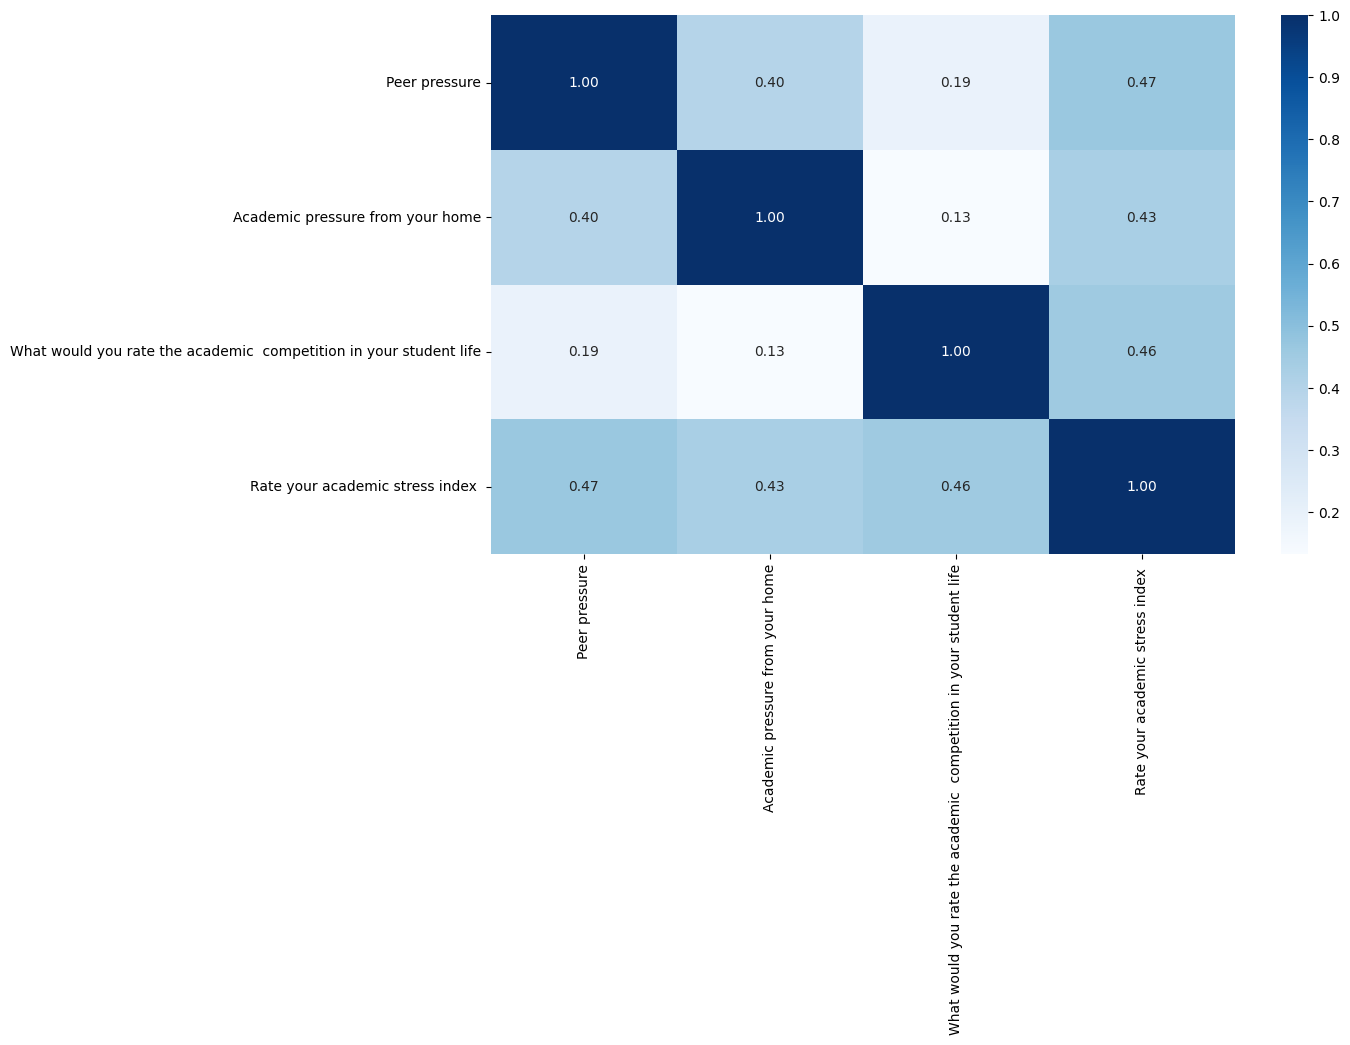

In [ ]:
plt.figure(figsize=(12,7))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

normalizing and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale

StandardScaler()

encoding

In [ ]:
categorical_cols = [
    'Your Academic Stage',
    'Study Environment',
    'What coping strategy you use as a student?',
    'Do you have any bad habits like smoking, drinking on a daily basis?'
]

dummies = pd.get_dummies(df[categorical_cols])

df = pd.concat([df, dummies], axis=1)

df.drop(columns=categorical_cols, axis=1, inplace=True)

In [ ]:
df.head()

,Timestamp,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index,Your Academic Stage_high school,Your Academic Stage_post-graduate,Your Academic Stage_undergraduate,Study Environment_Noisy,Study Environment_Peaceful,Study Environment_disrupted,What coping strategy you use as a student?_Analyze the situation and handle it with intellect,What coping strategy you use as a student?_Emotional breakdown (crying a lot),"What coping strategy you use as a student?_Social support (friends, family)","Do you have any bad habits like smoking, drinking on a daily basis?_No","Do you have any bad habits like smoking, drinking on a daily basis?_Yes","Do you have any bad habits like smoking, drinking on a daily basis?_prefer not to say"
0,24/07/2025 22:05:39,4,5,3.0,5,False,False,True,True,False,False,True,False,False,True,False,False
1,24/07/2025 22:05:52,3,4,3.0,3,False,False,True,False,True,False,True,False,False,True,False,False
2,24/07/2025 22:06:39,1,1,2.0,4,False,False,True,False,True,False,False,False,True,True,False,False
3,24/07/2025 22:06:45,3,2,4.0,3,False,False,True,False,True,False,True,False,False,True,False,False
4,24/07/2025 22:08:06,3,3,4.0,5,False,False,True,False,True,False,True,False,False,True,False,False


In [3]:
pip install nbconvert

In [6]:
!jupyter nbconvert --to markdown EDA_FOR_RANDOM_DATA_SET.ipynb

[NbConvertApp] Converting notebook EDA_FOR_RANDOM_DATA_SET.ipynb to markdown
[NbConvertApp] Support files will be in EDA_FOR_RANDOM_DATA_SET_files/
[NbConvertApp] Making directory EDA_FOR_RANDOM_DATA_SET_files
[NbConvertApp] Writing 62445 bytes to EDA_FOR_RANDOM_DATA_SET.md
